# Project 3 - Web APIs & NLP

## Part Two: Exploratory Data Analysis

### Contents:
* Import Libraries
* Exploratory Data Analysis
    - Load in Datasets
        - Date range of dataset
        - Summary Statistics
        - Outcomes from Summary Statistics
* Frequently Occurring Words
    - Single Gram Words Visualizations
    - Bigram Words Visualizations

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#graphing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#using nlp 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 

### Exploratory Data Analysis

Importing our clean dataframes, we can now explore our data further. First, I will show the date range for the data scraped. Then I will want to get summary statistics for each dataframe. Lastly I will want to determine the frequently occuring words for each dataframe. 

#### Load in datasets

In [2]:
mbti = pd.read_csv('./datasets/mbti_clean.csv')
astro = pd.read_csv('./datasets/astrology_clean.csv')

In [3]:
#import the combined subreddit data
subreddit = pd.read_csv('./datasets/subreddit_combined.csv')

#### Date Range for data scraped

In [4]:
mbti['created_utc'].sort_values()

1324    1657401382
1323    1657402002
1322    1657402145
1321    1657403123
1320    1657403804
           ...    
4       1658557876
3       1658558060
2       1658559322
1       1658560467
0       1658560509
Name: created_utc, Length: 1325, dtype: int64

The data for r/mbti ranges from Sunday, 10 July 2022 to Saturday, July 23, 2022.

In [5]:
astro['created_utc'].sort_values()

1778    1653452570
1777    1653453207
1776    1653454096
1775    1653455877
1774    1653456049
           ...    
4       1658547912
3       1658548308
2       1658551378
1       1658551502
0       1658558627
Name: created_utc, Length: 1779, dtype: int64

The data for r/Horoscope ranges from Wednesday, 25 May 2022 to Friday, 22 July 2022.

#### Summary Statistics
In general, summary statistics will provide information about our two dataframes. We will use the info and describe methods from the Pandas library to get our information.

Subreddit 1: mbti

In [6]:
#remove created_utc as we don't need it anymore 
mbti = mbti.drop('created_utc',axis=1)

In [7]:
#checking the info for mbti
mbti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1325 non-null   object
 1   author     1325 non-null   object
 2   selftext   1325 non-null   object
 3   subreddit  1325 non-null   object
dtypes: object(4)
memory usage: 41.5+ KB


Looking at the mbti dataset, there are 1325 entries and all of the datatypes are in object form. 

In [8]:
#checking the stats for mbti
mbti.describe().T

,count,unique,top,freq
title,1325,1257,Majestic girl,20
author,1325,819,Hydra-Sagaria,52
selftext,1325,1223,[removed],85
subreddit,1325,1,mbti,1325


Looking at the mbti dataset, the dataset seems ordinary. We also noticed that the dataset has 20 titles that are similar, 52 posts were from a User called Hydra-Sagaria, and there is 85 removed content. We will need to explore further with visualizations to fully determine the irregulars in this dataset.

Subreddit 2: astrology

In [9]:
#remove created_utc as we don't need it anymore 
astro = astro.drop('created_utc',axis=1)

In [10]:
#Checking the info for astrology
astro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1779 non-null   object
 1   author     1779 non-null   object
 2   selftext   1779 non-null   object
 3   subreddit  1779 non-null   object
dtypes: object(4)
memory usage: 55.7+ KB


Looking at the astrology dataset, there are 1779 entries and also all of the datatypes are in object form. There is no missing data in selftext feature as like subreddit 1. We will have to determine what to do with this feature as well later on.

In [11]:
#checking the stats for subreddit 2
astro.describe().T

,count,unique,top,freq
title,1779,1736,The Sole Dispositor/Final Dispositor in Astrol...,4
author,1779,1435,slowfruits,10
selftext,1779,5,[removed],1775
subreddit,1779,1,astrology,1779


Looking at the astrology dataset, the dataset seems ordinary. I also noticed that the dataset has 4 titles that are similar, 10 posts were from a User called slowfruits, and there is 1775 removed content. I will also need to explore further with visualizations to fully determine the irregulars in this dataset as well.

After sorting through the statistics, I determined that I will not use the selftext author feature because many of these posts consist of not-text data and not relevant. I will not be able to use this data when modeling classification. So lets drop the selftext feature in both of our datasets.


#### Outcomes from Summary Statistics
Subreddit 1: mbti

In [12]:
#dropping the selftext feature 
mbti.drop(['selftext','author'], axis = 1, inplace = True)

Let's see if it works

In [13]:
#checking the shape 
mbti.shape

(1325, 2)

Subreddit 2: astrology

In [14]:
#dropping the selftext feature 
astro.drop(['selftext','author'], axis = 1, inplace = True)

In [15]:
#checking the shape 
astro.shape

(1779, 2)

Both of the datasets have only two fetaures: title and subreddit.

Recalling my problem statement, I am trying to find content that are similar to two web sources. Based off the features I have left, I should only focus my model on the title feature because it has the largest content I can observe out of all the features. With this in mind, I will also want the title feature because it will help me in using Natural Language Processing (NLP) to train my classification model. Therefore, in the next section, I will investigate the use of NLP in my data science process.

I will start with finding the frequently occurring words in each of my datasets because in effect, I want to see if these words have similar content in both of the datasets.

### Frequently Occurring Words
Natural Language Processing (NLP) describes the field of getting computers to understand human language. In other words, we will be using the title feature with NLP because we will want the computer to understand how to sort, filter, and examine frequently occuring words in both of our datasets.

We will begin with using the lemmatize function to get an accurate set of words. Then, we will use CountVectorizer from the sklearn library. CountVectorizer is the easiest way for us to convert text data into a structured, numeric X dataframe. We are going to use CountVectorizer because it only looks at pure counts. The pure counts here are the "frequently" words in each dataset. Then, we will create a visualization of these similar words and explain our insights based off the visualizations.

Lets create a function to find the most frequently single gram words use in each dataframe.

In [16]:

def word_counter(df):
    
    #Getting our text data in our dataframe and use the copy function so we will not miss up our dataframe
    token = df.copy()
    
    #Instantiate tokenizer
    tokenizer = RegexpTokenizer(r'[A-z]+')

    #Run tokenizer, use join method to get our post to become lowercase
    #Created with Noah C. 
    tokens = [" ".join(tokenizer.tokenize(post.lower())) for post in token]
    
    #Instantiate lemmatizer
    lemmatizer = WordNetLemmatizer()

    #use the split method to split our posts and lemmatize individual words in each post 
    #Created with Noah C. 
    tokens_lem = [[lemmatizer.lemmatize(word) for word in post.split(' ')] for post in tokens]

    #lemmatize tokens, use the join method to get our post to become lemmatize
    #Created with Noah C.
    lem_tokens = [" ".join(post) for post in tokens_lem]
    
    #replace our text data with new lemmatize data
    df = lem_tokens
    
    #Instantiate a CountVectorizer
    cvec = CountVectorizer(stop_words = 'english')
    #using the stop words parameter & setting it to english to eliminate a group of words
    
    #fit the vectorizer on our corpus
    cvec.fit(df)
    
    #transform the corpus
    title = cvec.transform(df)
    
    #convert df into a dataframe
    df = pd.DataFrame(title.toarray(), #able to have strings into floats
                          columns = cvec.get_feature_names()) #get feature row names

    #Word counts 
    counts = df.sum().sort_values(ascending=False)
    
    return counts

Lets implement this function on our two dataframes.

In [17]:
word_counter(mbti['title'])

type         340
mbti         183
likely       100
think         95
function      85
            ... 
happiest       1
happen         1
hang           1
handle         1
zoophilia      1
Length: 1687, dtype: int64

In [18]:
word_counter(astro['title'])

moon         226
house        223
sign         192
chart        183
astrology    165
            ... 
digger         1
nin            1
nightmare      1
disagree       1
zodiacal       1
Length: 1986, dtype: int64

Next, lets look at this visually to understand it better, lets pick the top 10 words.

#### Single Gram Words Visualizations
Subreddit 1: MBTI

In [19]:
#create a new dataframe for wordcount
mbti_wordcount = pd.DataFrame(data = word_counter(mbti['title']),#using the function above
                               columns = ["Frequency"]) #calling the column frequency

In [20]:
#creating a top10 variable from our dataframe
mbti_wordcount_top10 = mbti_wordcount.head(10)

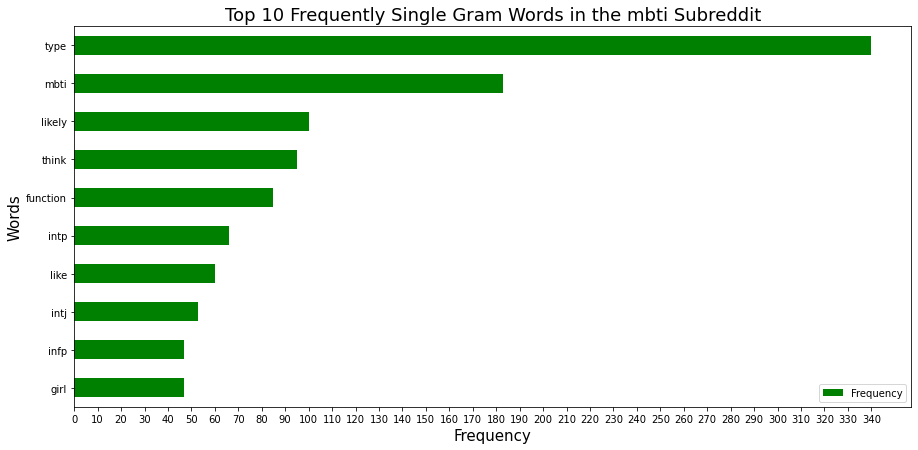

In [21]:
#creating a barh graph for the wordcount dataframe 

#create a barh of our data
mbti_wordcount_top10.sort_values(by = 'Frequency', #by the fequency column
                                  ascending = True).plot(kind = 'barh', #barh type
                                                         color = 'green', #color
                                                         figsize = (15,7))#graph size

plt.xlabel('Frequency', fontsize = 15)#xlabel on graph
plt.ylabel('Words', fontsize = 15)#ylabel on graph 
plt.xticks(np.arange(0, 350, step = 10))#change the ticks on the x-axis

plt.title("Top 10 Frequently Single Gram Words in the mbti Subreddit", fontsize = 18); #title

I observed that the single gram words in subreddit 1 are spread out in the frequency scale.

Additionally, lets create a table to clearly show what is happening.

In [22]:
#looking at the top10
mbti_wordcount_top10

,Frequency
type,340
mbti,183
likely,100
think,95
function,85
intp,66
like,60
intj,53
girl,47
infp,47


**INSIGHTS:**

I concluded that 'type' & 'mbti' is the most occurring single gram word. That is a vaild statement because subreddit 1 is all about that and there is 16 'type's of MBTI. In general, all of these words are what subreddit 1 is about. 

Subreddit 2: Astrology

In [23]:
#create a new dataframe for wordcount
astro_wordcount = pd.DataFrame(data = word_counter(astro['title']),#using the function above
                               columns = ["Frequency"]) #calling the column frequency


In [24]:
#creating a top10 variable from our dataframe
astro_wordcount_top10 = astro_wordcount.head(10)

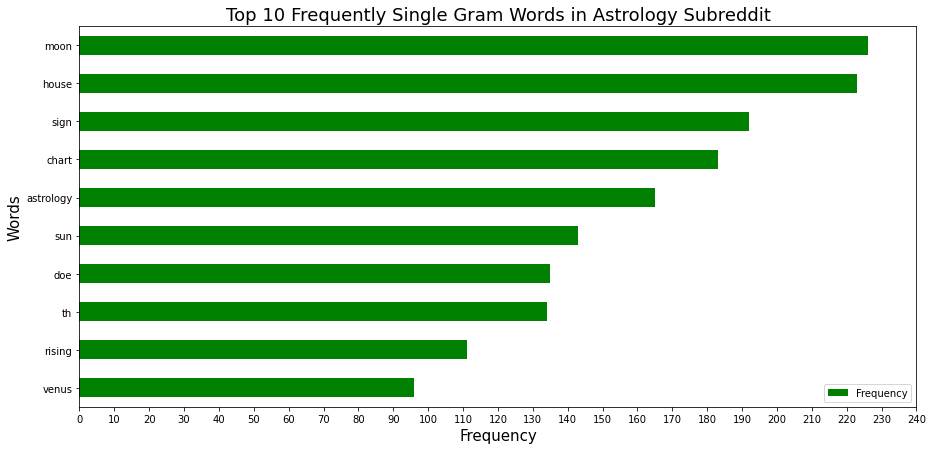

In [25]:
#creating a barh graph for the wordcount dataframe 

#create a barh of our data
astro_wordcount_top10.sort_values(by = 'Frequency', #by the fequency column
                                  ascending = True).plot(kind = 'barh', #barh type
                                                         color = 'green', #color
                                                         figsize = (15,7))#graph size

plt.xlabel('Frequency', fontsize = 15)#xlabel on graph
plt.ylabel('Words', fontsize = 15)#ylabel on graph 
plt.xticks(np.arange(0, 250, step = 10))#change the ticks on the x-axis

plt.title("Top 10 Frequently Single Gram Words in Astrology Subreddit", fontsize = 18); #title

I also observed that the single gram words in subreddit 2 are spread out in the frequency scale.

Additionally, lets also create a table to clearly show what is happening.

In [26]:
#looking at the top10 
astro_wordcount_top10

,Frequency
moon,226
house,223
sign,192
chart,183
astrology,165
sun,143
doe,135
th,134
rising,111
venus,96


**INSIGHTS:**

I concluded that 'moon' is the most occurring single gram word. That is a vaild statement because subreddit 2 is all about that as astrology involve moon, sun and etc. In general, all of these words are what subreddit 2 is about. Also, it is interesting that the word 'th' is up there. Yet, there is another typo up there 'doe' and that might sway our model results.

So,I have looked at the top 10 frequently use single gram words for each dataframe. Lets look further to get more evidence of the connection between both subreddits. So lets try looking at bigram words.

Lets create a function to find the most frequently bigram words use in each dataframe.

In [27]:
#lets create a function to find the similar words
def word_counter_two(df):
    
    #Getting our text data in our dataframe and use the copy function so we will not miss up our dataframe
    token = df.copy()
    
    #Instantiate tokenizer
    tokenizer = RegexpTokenizer(r'[A-z]+')

    #Run tokenizer, use join method to get our post to become lowercase
    #Created with Noah C. 
    tokens = [" ".join(tokenizer.tokenize(post.lower())) for post in token]
    
    #Instantiate lemmatizer
    lemmatizer = WordNetLemmatizer()

    #use the split method to split our posts and lemmatize individual words in each post 
    #Created with Noah C. 
    tokens_lem = [[lemmatizer.lemmatize(word) for word in post.split(' ')] for post in tokens]

    #lemmatize tokens, use the join method to get our post to become lemmatize
    #Created with Noah C.
    lem_tokens = [" ".join(post) for post in tokens_lem]
    
    #replace our text data with new lemmatize data
    df = lem_tokens
    
    #Instantiate a CountVectorizer
    cvec = CountVectorizer(stop_words = 'english',
                            ngram_range = (2,2))#getting bigram words
    #using the stop words parameter & setting it to english to eliminate a group of words
    
    #fit the vectorizer on our corpus
    cvec.fit(df)
    
    #transform the corpus
    title = cvec.transform(df)
    
    #convert df into a dataframe
    df = pd.DataFrame(title.toarray(), #able to have strings into floats
                          columns = cvec.get_feature_names()) #get feature row names

    #Word counts 
    counts = df.sum().sort_values(ascending=False)
    
    return counts

Lets implement this function on our two dataframes.

In [28]:
word_counter_two(mbti['title'])

type likely           58
mbti type             47
cognitive function    25
majestic girl         20
think type            17
                      ..
guy know               1
guy recommend          1
guy think              1
guy type               1
zoophilia judge        1
Length: 3492, dtype: int64

In [29]:
word_counter_two(astro['title'])

th house              111
birth chart            45
doe mean               34
zodiac sign            24
sun sign               23
                     ... 
guy attracted           1
guide process           1
guide advice            1
guess zodiac            1
zodiacal longitude      1
Length: 5432, dtype: int64

Next, lets also look at this visually to understand it better, lets pick the 10 as before.

#### Bigram Words Visualizations
Subreddit 1: MBTI

In [30]:
#create a new dataframe for wordcount
mbti_wordcount_two = pd.DataFrame(data = word_counter_two(mbti['title']),#using the function above
                               columns = ["Frequency"]) #calling the column frequency

In [31]:
#creating a top10 variable from our dataframe
mbti_wordcount_top10_two = mbti_wordcount_two.head(10)

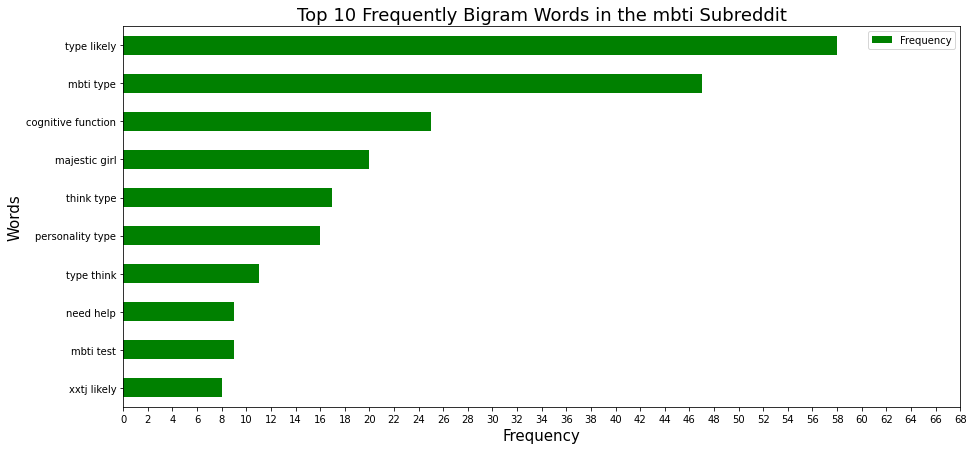

In [32]:
#creating a barh graph for the wordcount dataframe 

#create a barh of our data
mbti_wordcount_top10_two.sort_values(by = 'Frequency', #by the fequency column
                                  ascending = True).plot(kind = 'barh', #barh type
                                                         color = 'green', #color
                                                         figsize = (15,7))#graph size

plt.xlabel('Frequency', fontsize = 15)#xlabel on graph
plt.ylabel('Words', fontsize = 15)#ylabel on graph 
plt.xticks(np.arange(0, 70, step = 2))#change the ticks on the x-axis

plt.title("Top 10 Frequently Bigram Words in the mbti Subreddit", fontsize = 18); #title


I observed that the bigram words in subreddit 1 are also spread out in the frequency scale.

Additionally, lets also create a table to clearly show what is happening.

In [33]:
#looking at the top10
mbti_wordcount_top10_two

,Frequency
type likely,58
mbti type,47
cognitive function,25
majestic girl,20
think type,17
personality type,16
type think,11
mbti test,9
need help,9
xxtj likely,8


**INSIGHTS:** 

I concluded that 'type likely' is the most occurring bigram word. In general, again all of these words are what subreddit 1 is about. 

Subreddit 2: astrology

In [34]:
#create a new dataframe for wordcount
astro_wordcount_two = pd.DataFrame(data = word_counter_two(astro['title']),#using the function above
                               columns = ["Frequency"]) #calling the column frequency

In [35]:
#creating a top10 variable from our dataframe
astro_wordcount_top10_two = astro_wordcount_two.head(10)

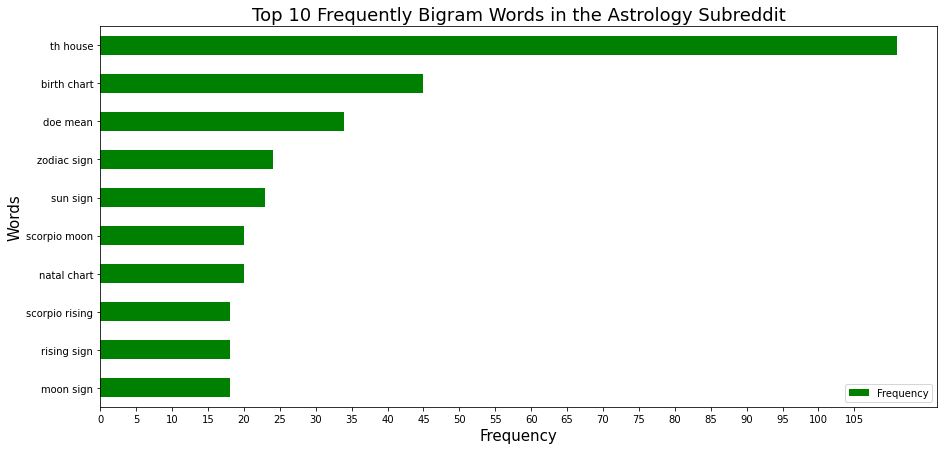

In [36]:
#creating a barh graph for the wordcount dataframe 

#create a barh of our data
astro_wordcount_top10_two.sort_values(by = 'Frequency', #by the fequency column
                                  ascending = True).plot(kind = 'barh', #barh type
                                                         color = 'green', #color
                                                         figsize = (15,7))#graph size

plt.xlabel('Frequency', fontsize = 15)#xlabel on graph
plt.ylabel('Words', fontsize = 15)#ylabel on graph 
plt.xticks(np.arange(0, 110, step = 5))#change the ticks on the x-axis

plt.title("Top 10 Frequently Bigram Words in the Astrology Subreddit", fontsize = 18); #title


I observed that the bigram words in subreddit 2 are spread out in the frequency scale.

Additionally, lets also create a table to clearly show what is happening.

In [37]:
#looking at the top10
astro_wordcount_top10_two

,Frequency
th house,111
birth chart,45
doe mean,34
zodiac sign,24
sun sign,23
natal chart,20
scorpio moon,20
moon sign,18
rising sign,18
scorpio rising,18


**INSIGHTS:**

I concluded that 'th house' is the most occurring bigram word. In general, again all of these words are what subreddit 2 is about. and 'th' is supposed to mean which house the star fall.

So what was my results? I do not have similar content when I use both single gram and bigram words. Given that information,I can look for more similarities and difference in both of our subreddit posts if I explore more NLP functions. I will explore this later on.